Implement a KNN model to classify the animals in to categorie

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read the data

In [5]:
zoo=pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [6]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

<Axes: >

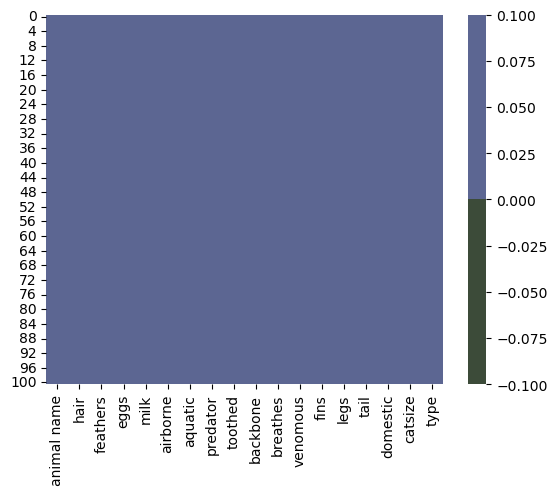

In [9]:
color=['#3C4B39','#5C6692']
pal=sns.color_palette(color)
sns.heatmap(zoo.isnull(),cmap=pal)

In [12]:
zoo.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


<Axes: >

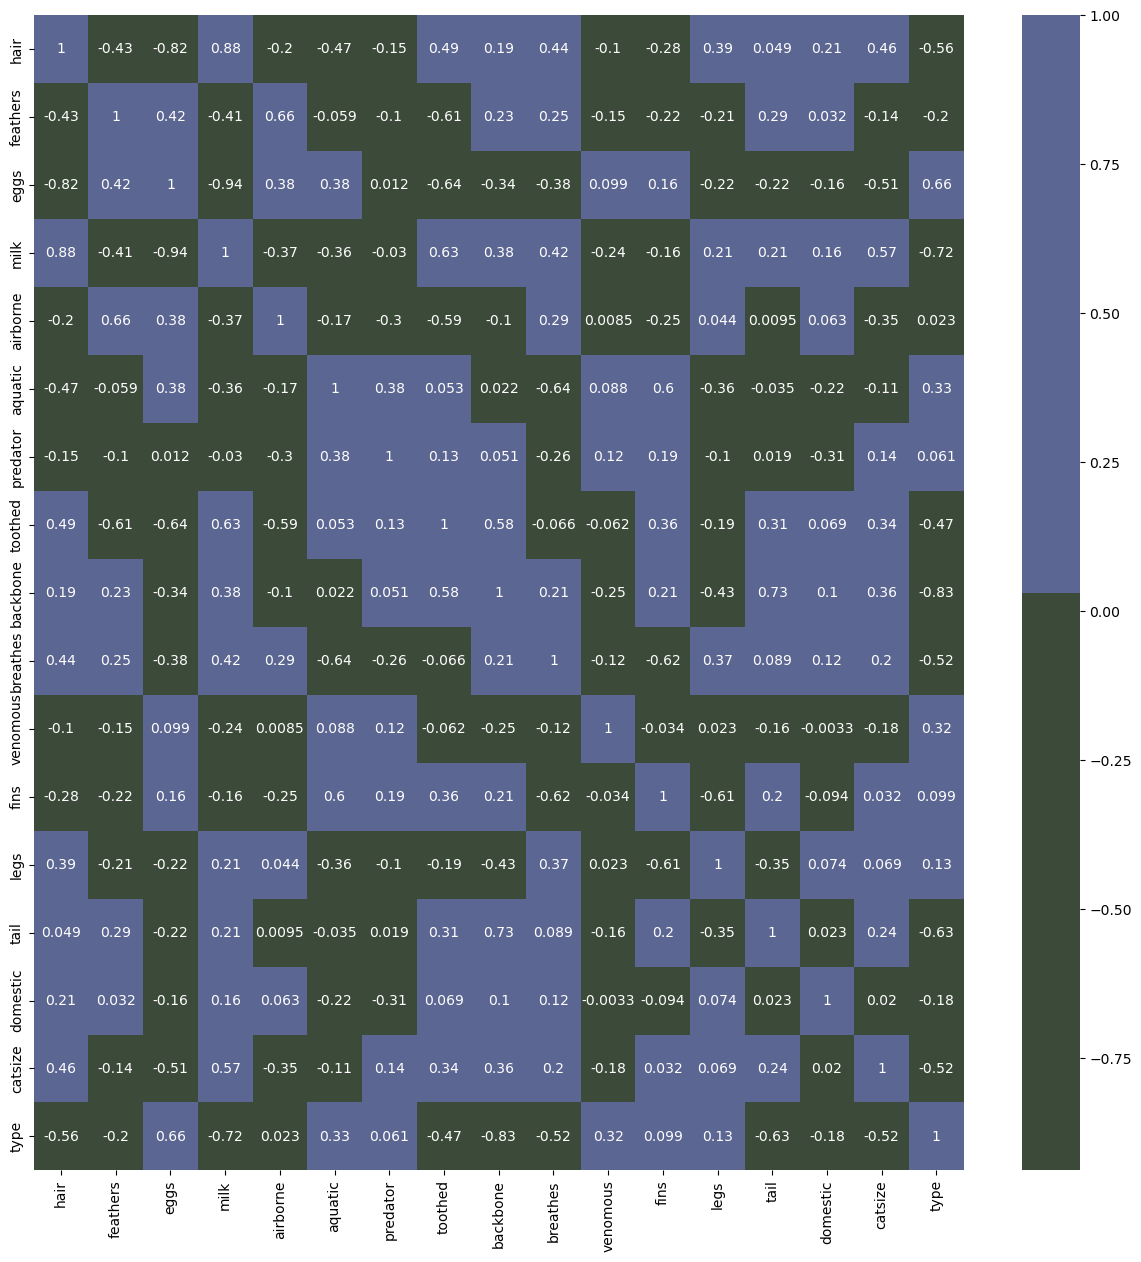

In [18]:
color=['#3C4B39','#5C6692']
plt.figure(figsize=(15,15))
pal=sns.color_palette(color)
sns.heatmap(zoo.corr(),cmap=pal,annot=True)

In [19]:
zoo.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [21]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


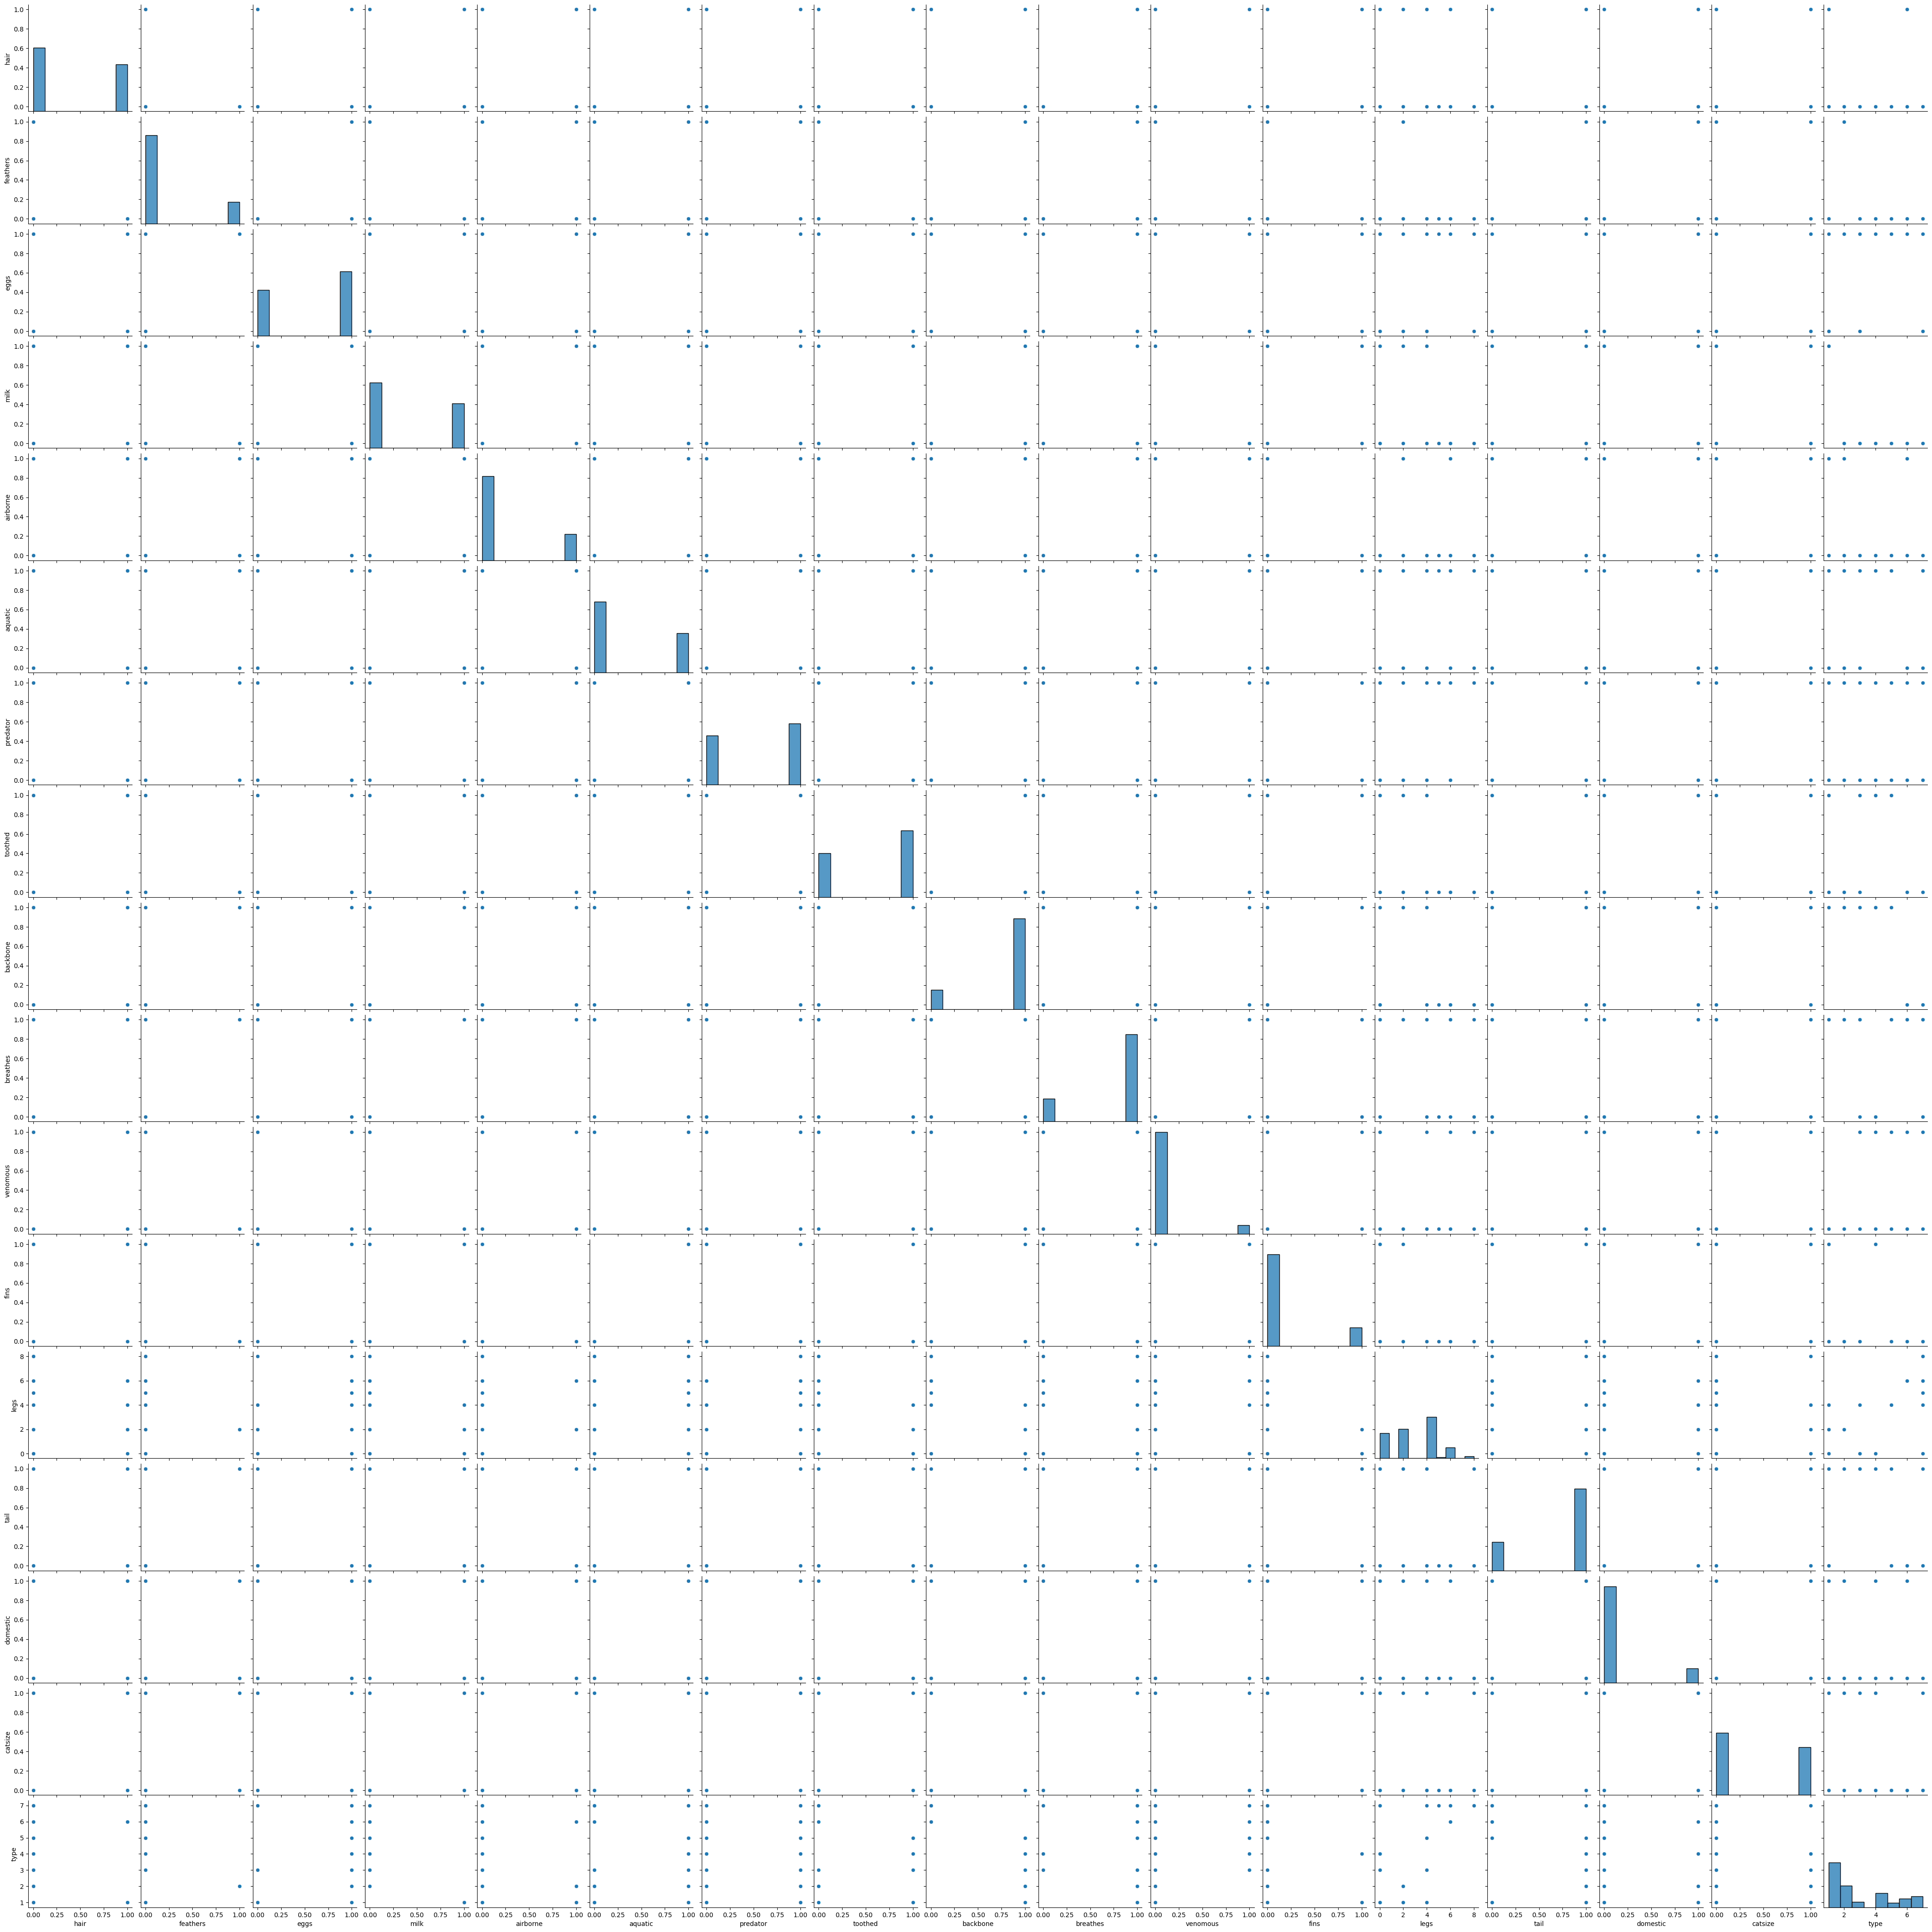

In [22]:
sns.pairplot(data=zoo)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'hair'),
  Text(1, 0, 'feathers'),
  Text(2, 0, 'eggs'),
  Text(3, 0, 'milk'),
  Text(4, 0, 'airborne'),
  Text(5, 0, 'aquatic'),
  Text(6, 0, 'predator'),
  Text(7, 0, 'toothed'),
  Text(8, 0, 'backbone'),
  Text(9, 0, 'breathes'),
  Text(10, 0, 'venomous'),
  Text(11, 0, 'fins'),
  Text(12, 0, 'legs'),
  Text(13, 0, 'tail'),
  Text(14, 0, 'domestic'),
  Text(15, 0, 'catsize'),
  Text(16, 0, 'type')])

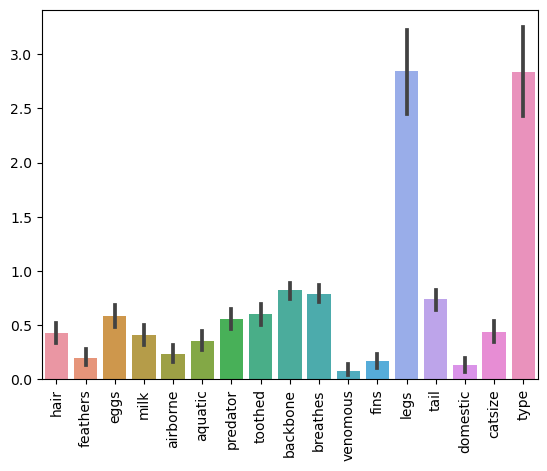

In [25]:
sns.barplot(data=zoo)
plt.xticks(rotation=90)

In [26]:
X=zoo.iloc[:,1:17]
y=zoo.iloc[:,17]

In [27]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [28]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 16), (21, 16), (80,), (21,))

# build  the model

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [83]:
model=KNeighborsClassifier(n_neighbors=7)

In [84]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [85]:
X_train = np.array(X_train)


In [86]:
train_pred=model.predict(X_train)
train_pred

array([5, 5, 6, 1, 7, 6, 7, 1, 1, 2, 5, 1, 1, 2, 1, 1, 7, 1, 2, 7, 4, 4,
       2, 4, 1, 4, 1, 5, 4, 1, 7, 6, 1, 1, 4, 4, 2, 1, 1, 1, 6, 2, 2, 1,
       1, 1, 7, 1, 4, 1, 4, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 7, 2, 1, 1, 5,
       2, 4, 2, 2, 7, 4, 4, 4, 2, 4, 2, 5, 4, 6], dtype=int64)

In [87]:
confusion_matrix(y_train,train_pred)

array([[27,  0,  0,  2,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  2,  1,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  1,  0,  8]], dtype=int64)

In [88]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           1       0.96      0.93      0.95        29
           2       1.00      1.00      1.00        18
           3       0.00      0.00      0.00         4
           4       0.73      1.00      0.85        11
           5       0.67      1.00      0.80         4
           6       1.00      1.00      1.00         5
           7       1.00      0.89      0.94         9

    accuracy                           0.91        80
   macro avg       0.77      0.83      0.79        80
weighted avg       0.88      0.91      0.89        80



In [89]:
X_test=np.array(X_test)

In [90]:
test_pred=model.predict(X_test)
test_pred

array([1, 1, 4, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 4, 1, 1, 2, 4, 1, 4],
      dtype=int64)

In [91]:
confusion_matrix(y_test,test_pred)


array([[11,  0,  0,  1,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  1,  0,  0]], dtype=int64)

In [92]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.40      1.00      0.57         2
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.86        21
   macro avg       0.57      0.65      0.59        21
weighted avg       0.85      0.86      0.84        21



# Elbow plot

In [94]:
tr_acc=[]
ts_acc=[]
for k in range(1,15):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    train_acc=model.score(X_train,y_train)
    test_acc=model.score(X_test,y_test)
    tr_acc.append(train_acc)
    ts_acc.append(test_acc)

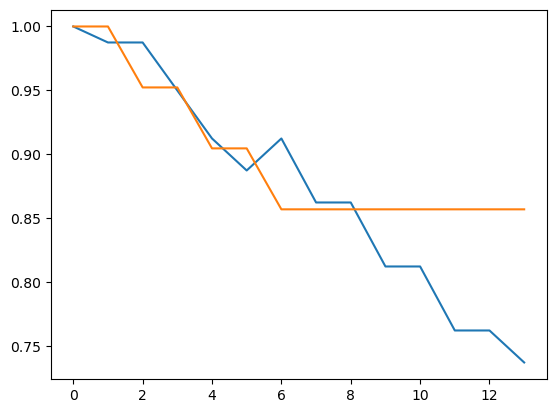

In [95]:
plt.plot(tr_acc)
plt.plot(ts_acc)
plt.show()

# To improve the accuracy assign the value for k=3 with help for elbow plot

In [102]:
model=KNeighborsClassifier(n_neighbors=3)

# train data

In [98]:
confusion_matrix(y_train,train_pred)

array([[27,  0,  0,  2,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  2,  1,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  1,  0,  8]], dtype=int64)

In [99]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           1       0.96      0.93      0.95        29
           2       1.00      1.00      1.00        18
           3       0.00      0.00      0.00         4
           4       0.73      1.00      0.85        11
           5       0.67      1.00      0.80         4
           6       1.00      1.00      1.00         5
           7       1.00      0.89      0.94         9

    accuracy                           0.91        80
   macro avg       0.77      0.83      0.79        80
weighted avg       0.88      0.91      0.89        80



# test data

In [100]:
confusion_matrix(y_test,test_pred)

array([[11,  0,  0,  1,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  1,  0,  0]], dtype=int64)

In [101]:
print(classification_report(y_test,test_pred))


              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.40      1.00      0.57         2
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.86        21
   macro avg       0.57      0.65      0.59        21
weighted avg       0.85      0.86      0.84        21



# To improve more accuracy  to assign the value for k=1

In [137]:
model=KNeighborsClassifier(n_neighbors=1)

In [138]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [139]:
X_train = np.array(X_train)


In [140]:
train_pred=model.predict(X_train)
train_pred

array([5, 5, 6, 1, 7, 6, 7, 1, 1, 2, 3, 1, 1, 2, 1, 1, 7, 1, 2, 7, 4, 4,
       2, 4, 1, 1, 1, 5, 3, 1, 7, 6, 1, 1, 4, 4, 2, 1, 1, 1, 6, 2, 2, 1,
       1, 1, 7, 1, 4, 1, 3, 2, 2, 1, 3, 2, 1, 1, 2, 2, 1, 7, 2, 1, 1, 5,
       2, 4, 2, 2, 7, 1, 4, 4, 2, 4, 2, 7, 4, 6], dtype=int64)

In [141]:
confusion_matrix(y_train,train_pred)

array([[29,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  9]], dtype=int64)

In [142]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         9

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# test data

In [146]:
X_test=np.array(X_test)

In [147]:
test_pred=model.predict(X_test)
test_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 3],
      dtype=int64)

In [148]:
confusion_matrix(y_test,test_pred)

array([[12,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [149]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



# finally testing accuracy is 1.00 using k value is 1

# visualize  the zoo data with help of TSNE

In [124]:
from sklearn.manifold import TSNE

In [125]:
model=TSNE(n_components=2)

In [126]:
tsne_comps=model.fit_transform(X)
tsne_comps

array([[  87.29574  ,    7.0167685],
       [ 246.9749   ,   -7.715856 ],
       [-121.68293  ,  240.86938  ],
       [ 121.35257  ,   23.114218 ],
       [ 135.35095  ,  -44.714592 ],
       [ 197.62418  ,   -6.709145 ],
       [ 179.86378  ,   57.032623 ],
       [-189.48064  ,  303.4636   ],
       [ -86.481285 ,  252.80075  ],
       [ 272.70184  ,   39.00256  ],
       [ 135.35095  ,  -44.714592 ],
       [-148.67216  ,   30.769983 ],
       [-155.30788  ,  241.71487  ],
       [-224.82713  ,  175.08862  ],
       [  11.90153  , -231.8181   ],
       [  60.80149  , -274.94086  ],
       [-200.96198  ,  -22.703173 ],
       [ 197.62418  ,   -6.709145 ],
       [ -92.51327  ,  215.89186  ],
       [ -42.080013 ,  230.37807  ],
       [-148.67216  ,   30.769983 ],
       [-202.54211  ,   28.931362 ],
       [ 197.62418  ,   -6.709145 ],
       [-112.00768  ,  -53.49951  ],
       [ 142.67912  , -295.0414   ],
       [  11.754291 , -179.95372  ],
       [ -21.944107 , -188.01637  ],
 

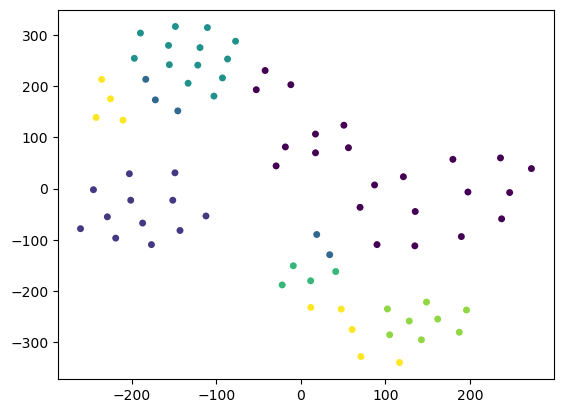

In [127]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y,cmap='viridis',edgecolors='white')
plt.show()

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

# Read the data

In [4]:
glass=pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass.shape

(214, 10)

In [8]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<Axes: >

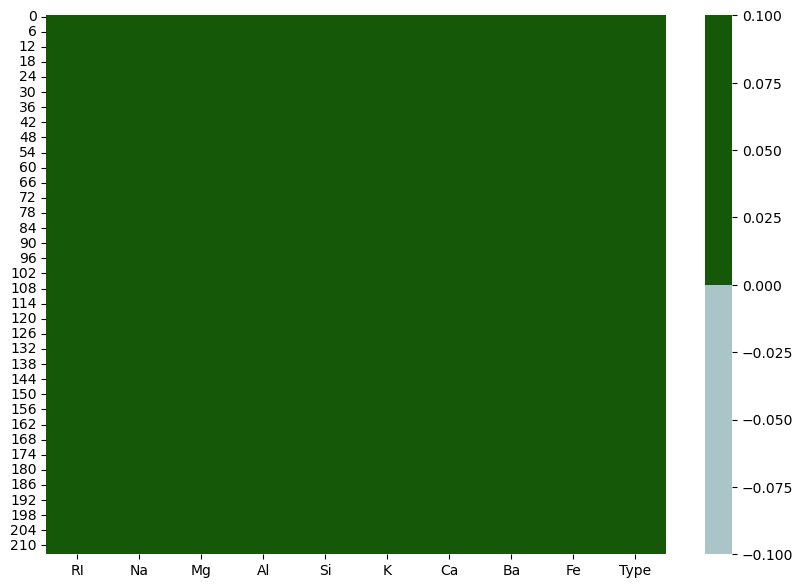

In [12]:
color=['#AAC5C7','#155807']
plt.figure(figsize=(10,7))
pal=sns.color_palette(color)
sns.heatmap(glass.isnull(),cmap=pal)

In [13]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<Axes: >

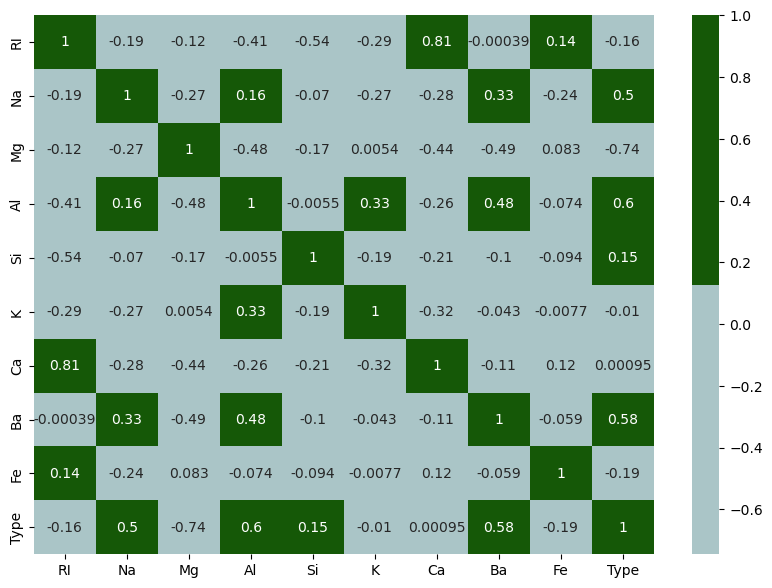

In [14]:
color=['#AAC5C7','#155807']
plt.figure(figsize=(10,7))
pal=sns.color_palette(color)
sns.heatmap(glass.corr(),cmap=pal,annot=True)

In [15]:
glass.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [16]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [18]:
glass.drop_duplicates(inplace=True)

In [19]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [21]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


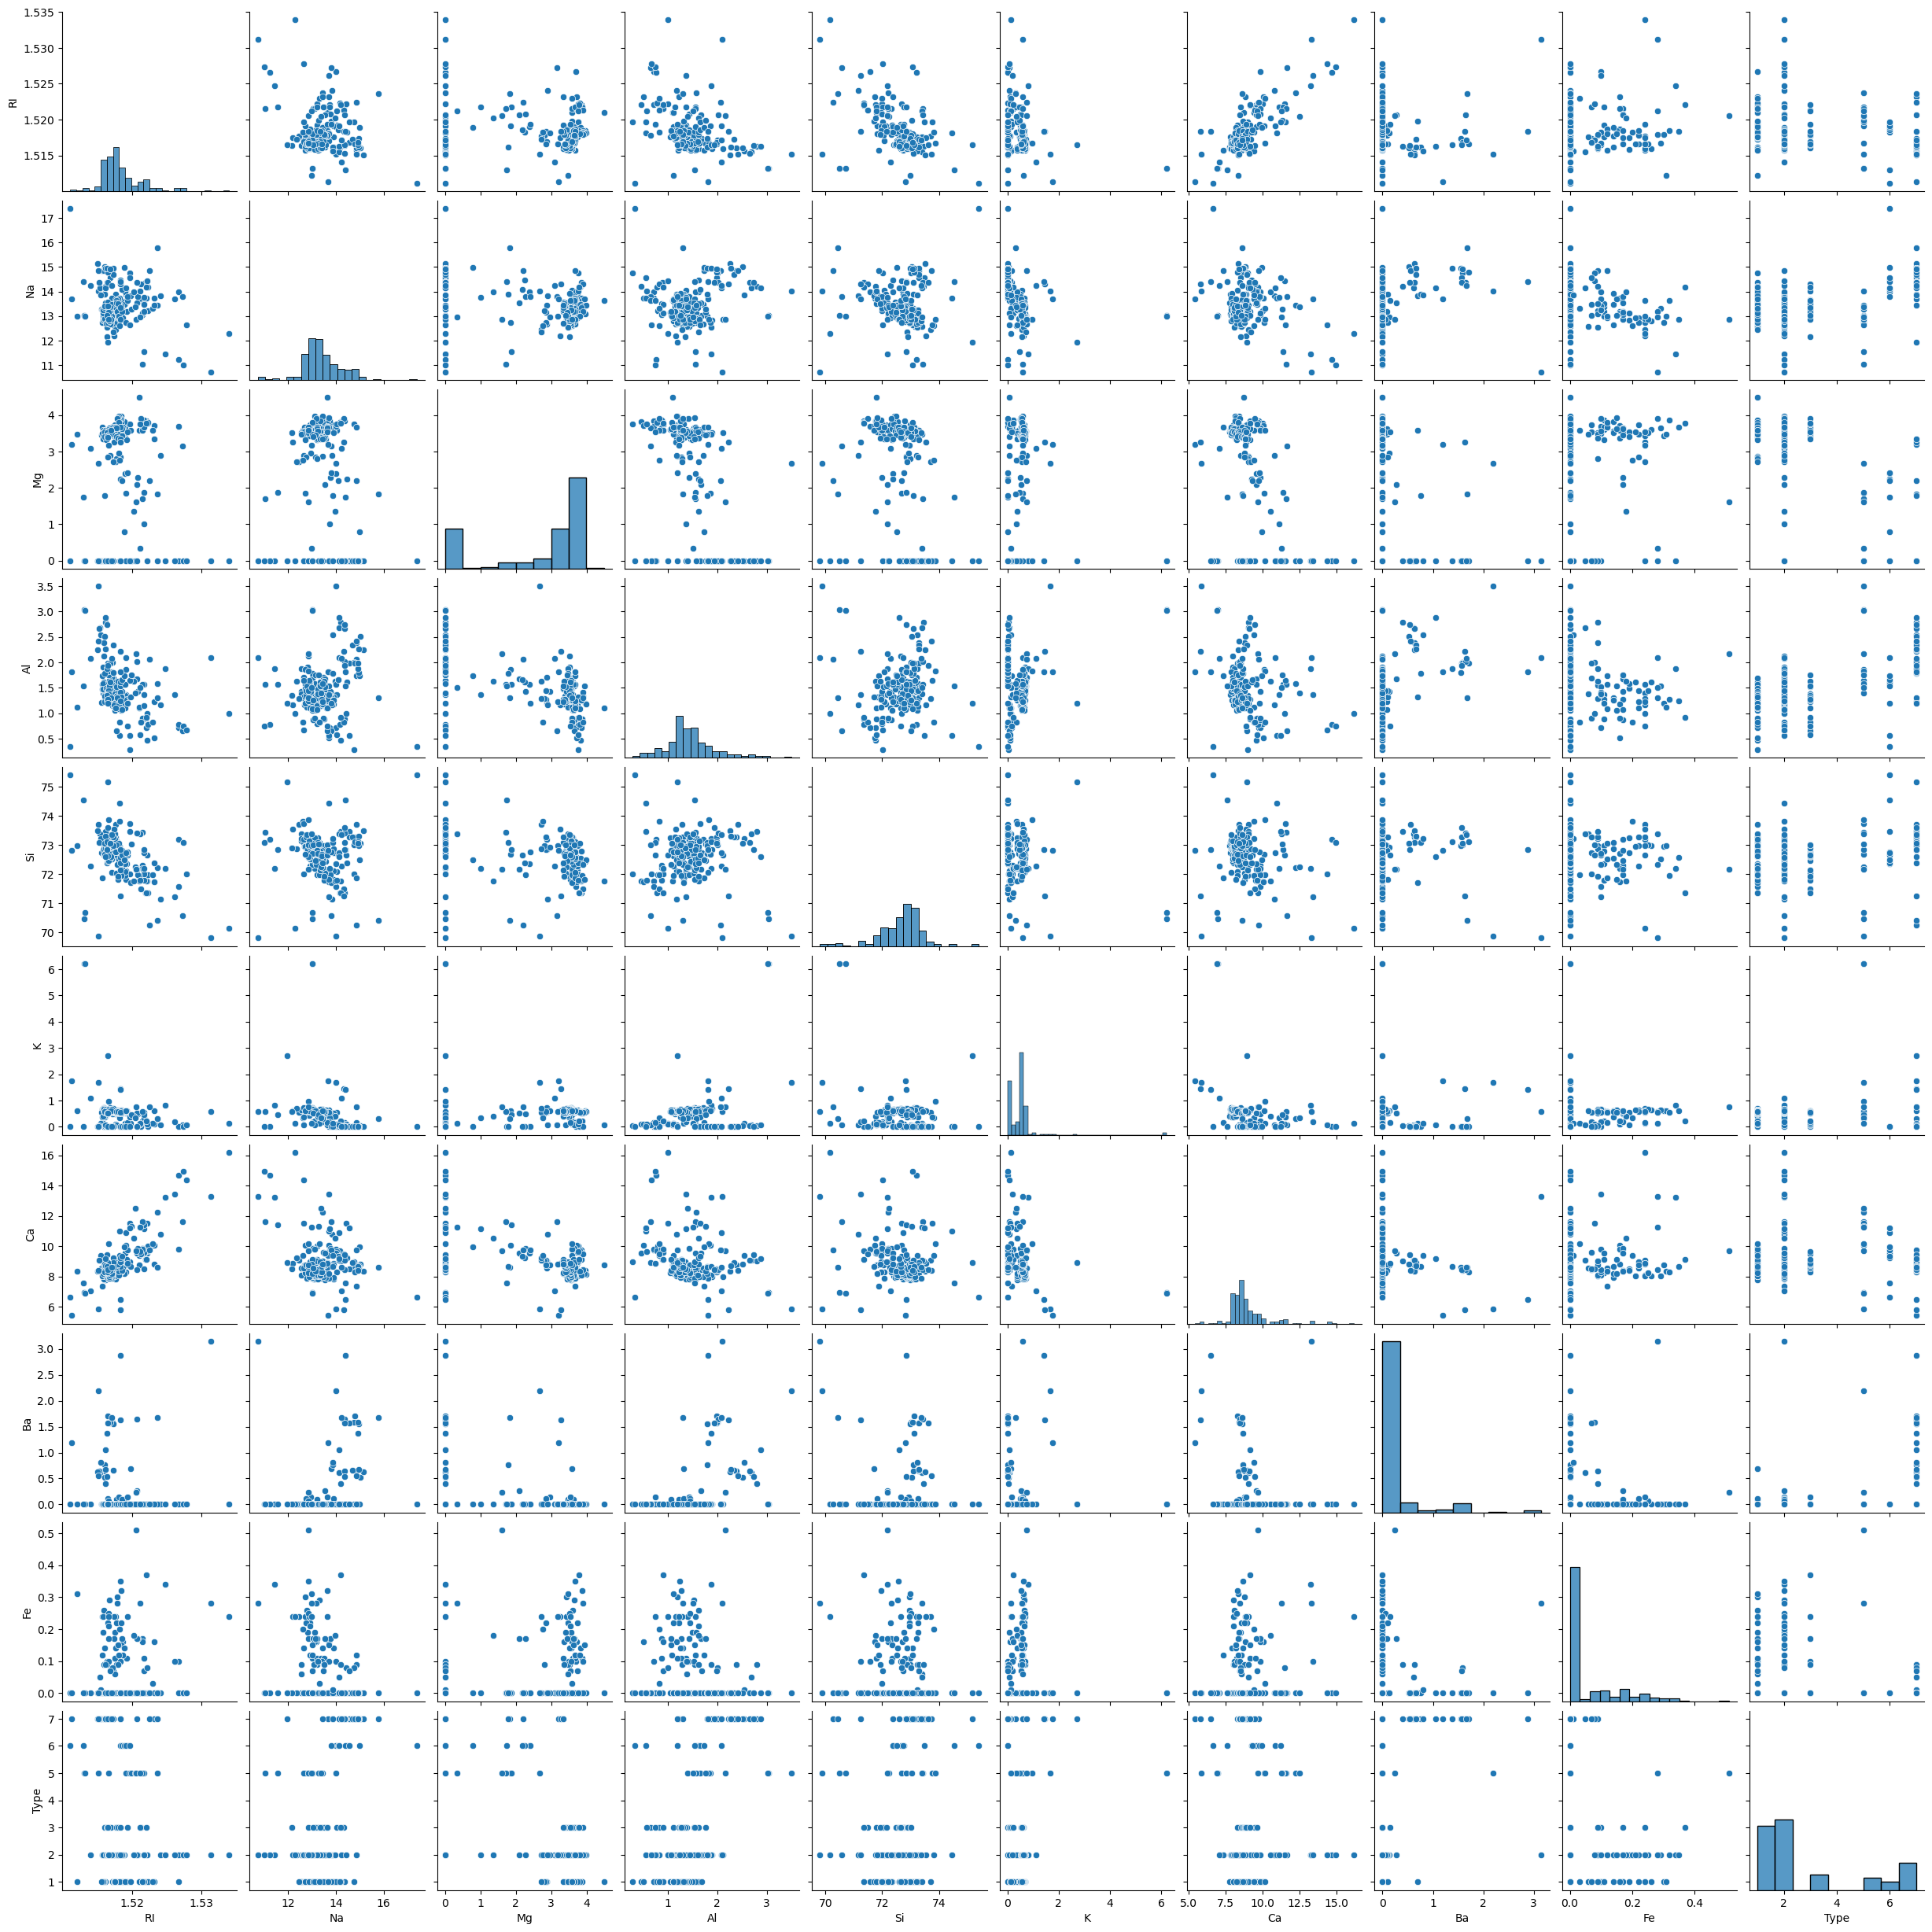

In [22]:
sns.pairplot(data=glass)

<Axes: >

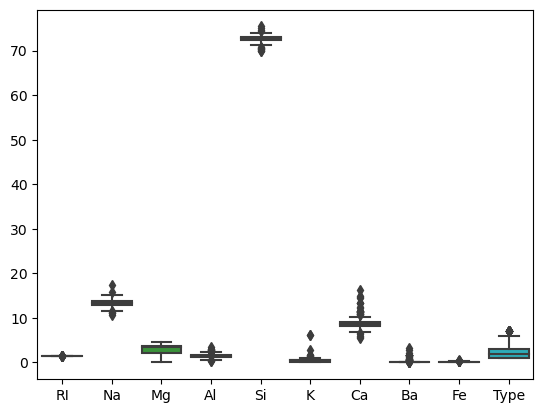

In [23]:
sns.boxplot(data=glass)

In [24]:
X=glass.iloc[:,:9]
y=glass.iloc[:,9]

In [25]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((170, 9), (43, 9), (170,), (43,))

# build the model

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
model=KNeighborsClassifier(n_neighbors=7)

In [43]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [44]:
train_pred=model.predict(X_train)
train_pred

array([2, 1, 5, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 5, 1, 2, 1, 1, 7, 2,
       2, 1, 5, 5, 1, 2, 1, 1, 1, 2, 1, 3, 1, 2, 5, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 7, 1, 1, 1, 2, 1, 1, 7, 7, 1, 1,
       2, 7, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 7, 2, 2, 5, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 7, 1, 3, 2, 1, 1, 2, 2, 1, 2, 7, 5, 7, 1,
       2, 1, 1, 5, 2, 2, 2, 7, 2, 2, 1, 3, 7, 2, 1, 5, 2, 7, 2, 1, 7, 1,
       1, 2, 1, 5, 7, 5, 2, 1, 2, 1, 1, 3, 7, 2, 2, 1, 1, 7, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 7, 1, 7, 2, 2, 1, 2, 2, 1], dtype=int64)

In [45]:
confusion_matrix(y_train,train_pred)

array([[50,  8,  1,  0,  0,  0],
       [16, 41,  1,  3,  0,  0],
       [11,  1,  2,  0,  0,  0],
       [ 0,  3,  0,  7,  0,  0],
       [ 2,  1,  0,  1,  0,  2],
       [ 1,  3,  0,  0,  0, 16]], dtype=int64)

In [46]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           1       0.62      0.85      0.72        59
           2       0.72      0.67      0.69        61
           3       0.50      0.14      0.22        14
           5       0.64      0.70      0.67        10
           6       0.00      0.00      0.00         6
           7       0.89      0.80      0.84        20

    accuracy                           0.68       170
   macro avg       0.56      0.53      0.52       170
weighted avg       0.66      0.68      0.66       170



In [47]:
test_pred=model.predict(X_test)
test_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 5, 2, 1, 2, 1, 5, 7, 1, 1, 2, 1, 7,
       7, 7, 1, 5, 1, 1, 1, 1, 1, 2, 1, 1, 2, 7, 2, 1, 1, 2, 1, 2, 1],
      dtype=int64)

In [48]:
confusion_matrix(y_test,test_pred)

array([[10,  0,  0,  0,  0,  0],
       [ 5,  9,  0,  1,  0,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  1,  0,  0],
       [ 2,  0,  0,  1,  0,  0],
       [ 0,  2,  0,  0,  0,  7]], dtype=int64)

In [49]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67        10
           2       0.69      0.60      0.64        15
           3       0.00      0.00      0.00         3
           5       0.33      0.33      0.33         3
           6       0.00      0.00      0.00         3
           7       1.00      0.78      0.88         9

    accuracy                           0.63        43
   macro avg       0.42      0.45      0.42        43
weighted avg       0.59      0.63      0.59        43



# Elbow plto

In [37]:
tr_acc=[]
ts_acc=[]
for k in range(1,15):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    train_acc=model.score(X_train,y_train)
    test_acc=model.score(X_test,y_test)
    tr_acc.append(train_acc)
    ts_acc.append(test_acc)

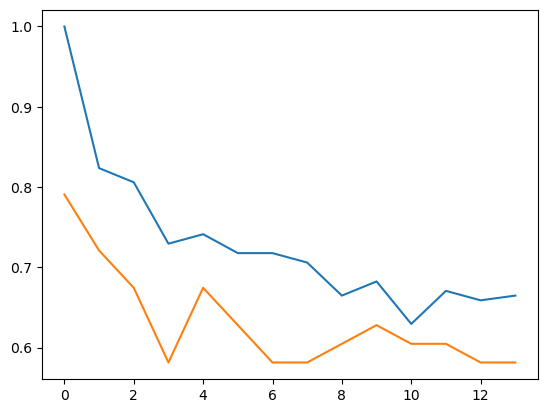

In [38]:
plt.plot(tr_acc)
plt.plot(ts_acc)
plt.show()

# To improve the accuracy assign the value for k=10 with help for elbow plot

In [73]:
model=KNeighborsClassifier(n_neighbors=3)

In [74]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [75]:
train_pred=model.predict(X_train)
train_pred

array([2, 3, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 2, 1, 5, 1, 2, 1, 1, 7, 5,
       2, 1, 5, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 5, 2, 1, 1, 2, 2, 3, 2,
       2, 1, 2, 1, 1, 3, 2, 1, 2, 1, 1, 7, 1, 1, 2, 2, 1, 1, 7, 6, 1, 1,
       2, 7, 3, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 6, 2, 7, 2, 2, 5, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 7, 1, 2, 5, 1, 3, 1, 2, 1, 1, 7, 5, 7, 1,
       2, 1, 1, 2, 2, 2, 2, 7, 2, 1, 1, 3, 6, 2, 3, 5, 2, 7, 2, 6, 7, 1,
       2, 2, 1, 5, 7, 5, 1, 1, 2, 1, 1, 3, 7, 2, 2, 1, 3, 7, 1, 1, 1, 5,
       3, 2, 2, 2, 2, 2, 2, 7, 1, 7, 2, 2, 1, 2, 7, 2], dtype=int64)

In [76]:
confusion_matrix(y_train,train_pred)

array([[51,  4,  4,  0,  0,  0],
       [ 9, 50,  0,  2,  0,  0],
       [ 7,  0,  7,  0,  0,  0],
       [ 0,  1,  0,  9,  0,  0],
       [ 0,  1,  0,  0,  4,  1],
       [ 1,  3,  0,  0,  0, 16]], dtype=int64)

In [77]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           1       0.75      0.86      0.80        59
           2       0.85      0.82      0.83        61
           3       0.64      0.50      0.56        14
           5       0.82      0.90      0.86        10
           6       1.00      0.67      0.80         6
           7       0.94      0.80      0.86        20

    accuracy                           0.81       170
   macro avg       0.83      0.76      0.79       170
weighted avg       0.81      0.81      0.80       170



In [78]:
test_pred=model.predict(X_test)
test_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 2, 7, 1, 2, 6, 5, 7, 1, 1, 2, 1, 7,
       7, 7, 1, 5, 1, 1, 6, 1, 1, 2, 3, 1, 2, 7, 7, 1, 1, 1, 2, 1, 1],
      dtype=int64)

In [79]:
confusion_matrix(y_test,test_pred)

array([[10,  0,  0,  0,  0,  0],
       [ 6,  8,  0,  1,  0,  0],
       [ 2,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  2],
       [ 0,  1,  0,  0,  2,  0],
       [ 1,  1,  0,  0,  0,  7]], dtype=int64)

In [80]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           1       0.53      1.00      0.69        10
           2       0.80      0.53      0.64        15
           3       1.00      0.33      0.50         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       0.78      0.78      0.78         9

    accuracy                           0.67        43
   macro avg       0.77      0.61      0.63        43
weighted avg       0.74      0.67      0.67        43



# visualize  the glass data with help of TSNE

In [82]:
from sklearn.manifold import TSNE

In [83]:
model=TSNE(n_components=2)

In [84]:
tsne_comps=model.fit_transform(X)
tsne_comps

array([[ 9.24364030e-01,  8.50015831e+00],
       [-9.89380836e+00,  5.56319761e+00],
       [-1.04229298e+01,  3.73875809e+00],
       [-5.72500801e+00,  3.87289691e+00],
       [-8.54560661e+00,  1.44560444e+00],
       [-1.07283173e+01, -1.83635902e+00],
       [-7.98637104e+00,  1.21002674e+00],
       [-7.74963951e+00,  1.50122583e-01],
       [-2.90918636e+00,  7.77959204e+00],
       [-6.67908096e+00, -2.29756355e+00],
       [-1.07910995e+01, -2.86331129e+00],
       [-5.52473307e+00, -3.87035394e+00],
       [-1.04685926e+01, -2.95505190e+00],
       [-7.38418770e+00, -3.67625213e+00],
       [-6.52235508e+00, -5.52154589e+00],
       [-7.10541487e+00, -4.32145452e+00],
       [-5.04800797e+00, -5.02505493e+00],
       [ 3.69795656e+00,  9.05911636e+00],
       [ 1.04340756e+00,  7.31783390e+00],
       [-4.47651339e+00, -2.30477169e-01],
       [-3.92505765e+00, -1.38499475e+00],
       [ 2.96428800e+00,  9.14338970e+00],
       [-3.74019790e+00, -2.94988465e+00],
       [-5.

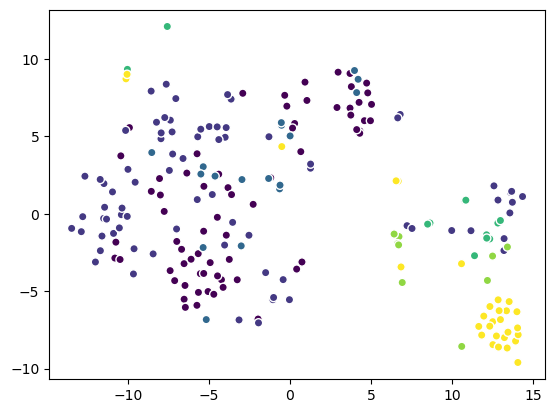

In [85]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y,cmap='viridis',edgecolors='white')
plt.show()